<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/44A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Automatic Speech Recognition (ASR)

## Wave Package

In [1]:
# Public API for display tools in IPython
from IPython.display import Audio # notebook

In [2]:
!wget https://www2.cs.uic.edu/~i101/SoundFiles/PinkPanther30.wav
Audio("PinkPanther30.wav", autoplay=True)

--2024-06-29 04:38:30--  https://www2.cs.uic.edu/~i101/SoundFiles/PinkPanther30.wav
Resolving www2.cs.uic.edu (www2.cs.uic.edu)... 131.193.32.16
Connecting to www2.cs.uic.edu (www2.cs.uic.edu)|131.193.32.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1323044 (1.3M) [audio/x-wav]
Saving to: ‘PinkPanther30.wav’

PinkPanther30.wav   100%[===================>]   1.26M   999KB/s    in 1.3s    

2024-06-29 04:38:32 (999 KB/s) - ‘PinkPanther30.wav’ saved [1323044/1323044]



In [3]:
!wget https://dl.espressif.com/dl/audio/ff-16b-2c-44100hz.wav
Audio("ff-16b-2c-44100hz.wav", autoplay=True)

--2024-06-29 04:39:47--  https://dl.espressif.com/dl/audio/ff-16b-2c-44100hz.wav
Resolving dl.espressif.com (dl.espressif.com)... 13.33.30.31, 13.33.30.7, 13.33.30.124, ...
Connecting to dl.espressif.com (dl.espressif.com)|13.33.30.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33002126 (31M) [audio/x-wav]
Saving to: ‘ff-16b-2c-44100hz.wav’

ff-16b-2c-44100hz.w 100%[===================>]  31.47M  --.-KB/s    in 0.1s    

2024-06-29 04:39:47 (308 MB/s) - ‘ff-16b-2c-44100hz.wav’ saved [33002126/33002126]



In [4]:
import wave

# Explain
# wave the file structure
# sample width
# framerate/sample_rate
# number of frames
# value of waves

# open wave file
obj = wave.open("PinkPanther30.wav", 'rb') # b stands for binary
# obj = wave.open("ff-16b-2c-44100hz.wav", 'rb')

print("Number of channels", obj.getnchannels())
print("Sample width:", obj.getsampwidth())
print("Framerate:", obj.getframerate())
print("Number of frames:", obj.getnframes())
print("Parameters:", obj.getparams())

frames = obj.readframes(obj.getnframes())
print(len(frames)/obj.getsampwidth(), frames[0], type(frames[0]))

obj.close()

Number of channels 1
Sample width: 2
Framerate: 22050
Number of frames: 661500
Parameters: _wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=661500, comptype='NONE', compname='not compressed')
661500.0 16 <class 'int'>


In [7]:
# write the wave file
sample_rate = 44100.0 # hertz
obj = wave.open("new_file.wav", 'wb')
obj.setnchannels(1) # mono
obj.setsampwidth(2)
obj.setframerate(sample_rate)
obj.writeframes(frames)
obj.close()

In [8]:
Audio("new_file.wav", autoplay=True)

22050
661500
2
30.0 seconds
(661500,)


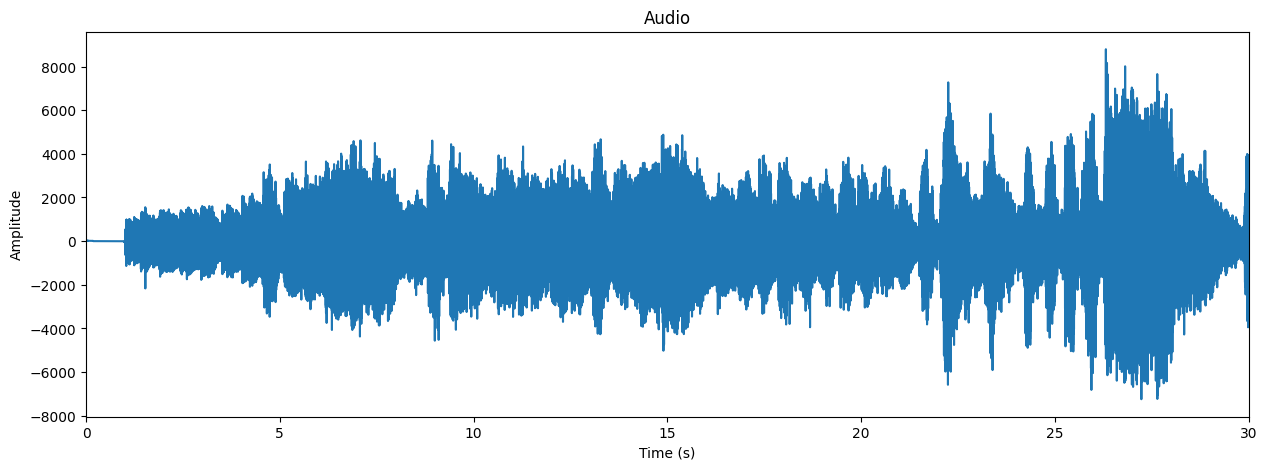

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


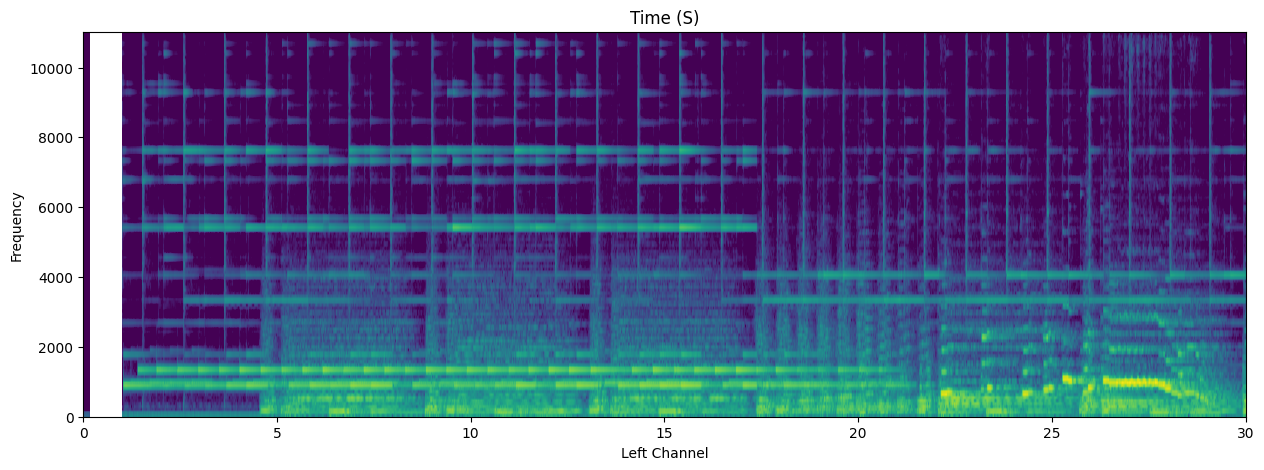

In [9]:
# https://Learnpython.com/blog/plot-waveform-in-python/
import wave
import numpy as np
import matplotlib.pyplot as plt

wav_obj = wave.open("PinkPanther30.wav", "r")

sample_freq = wav_obj.getframerate()
print(sample_freq)
n_samples = wav_obj.getnframes()
print(n_samples)
sample_width = wav_obj.getsampwidth()
print(sample_width)
t_audio = n_samples/sample_freq
print(t_audio, "seconds")

signal_wave = wav_obj.readframes(n_samples)
signal_wave = np.frombuffer(signal_wave, dtype=np.int16)
print(signal_wave.shape)

## for stereo
# L_channel = signal_wave[0::2]
# R_channel = signal_wave[1::2]

times = np.linspace(0, t_audio, num=n_samples)

plt.figure(figsize=(15, 5))
plt.plot(times, signal_wave)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio")
plt.xlim(0, t_audio)
plt.show()

plt.figure(figsize=(15, 5))
plt.specgram(signal_wave, Fs=sample_freq, vmin=-20, vmax=50)
plt.xlabel("Left Channel")
plt.ylabel("Frequency")
plt.title("Time (S)")
plt.xlim(0, t_audio)
plt.show()

## Pydub Package

In [10]:
# brew install ffmpeg
!pip install pydub
from pydub import AudioSegment

audio = AudioSegment.from_wav("PinkPanther30.wav")

# boost volume by 6dB
audio_boost = audio + 6

# repeat the clip twice
audio = audio * 2

# 2 sec fade in
audio = audio.fade_in(2000)

# 2 sec fade out
audio = audio.fade_out(1000).fade_out(1000)

# export to new file
audio.export("output_PP_mp3.mp3", format="mp3")

<_io.BufferedRandom name='output_PP_mp3.mp3'>

In [11]:
Audio("output_PP_mp3.mp3", autoplay=True)

## Speech_recognition Package

In [ ]:
!pip install SpeechRecognition

In [ ]:
import speech_recognition

recognizer = speech_recognition.Recognizer()

while True:
  try:
    with speech_recognition.Microphone() as mic:
      recognizer.adjust_for_ambient_noise(mic, duration=0.05)
      audio = recognizer.listen(mic)
      text = recognizer.recognize_google(audio)
      text = text.lower()
      print(f"Recognized: {text}")
  except:
    recognizer = speech_recognition.Recognizer()
    continue

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 44.4 MB/s eta 0:00:00


## PyAudio Package

In [1]:
!sudo apt install python3-pyaudio
!pip install PyAudio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-pyaudio is already the newest version (0.2.11-1.3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:

import pyaudio
import wave

FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
FPB = 3200

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=FPB,
                input_device_index=1) # priority of mics

print("Recording...")

frames = []
seconds = 5.0

for i in range(0, int(RATE / FPB * seconds)):
    data = stream.read(FPB)
    frames.append(data)

print("Finished recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open('output.wav', 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

## Librosa Package

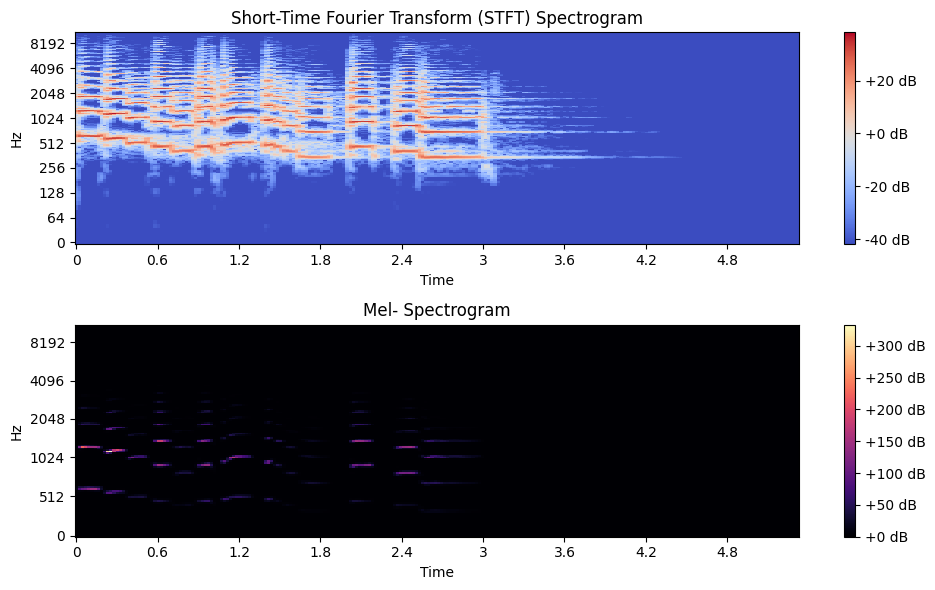

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load an audio file
audio_path = librosa.example("trumpet")
y, sr = librosa.load(audio_path)

# 1. Compare the short-Time Fourier Transform (STFT)
stft = librosa.stft(y)
stft_db = librosa.amplitude_to_db(abs(stft))

# 2. Compute Mel-Frequency Capstral Coefficiency (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# 3. Compute Mel-scaled power (energy) spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram)

# 4. Compute Chromogram from a waveform or power
chromogram = librosa.feature.chroma_stft(y=y, sr=sr)

# 5. Compute the Spectral Contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# 6. Compute the Tonnetz (tonal centroid features)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

# 7. Compute the Zero-Crossing Rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# 8. Compute the Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

# 9. Compute the Root-Mean_square (RMS) value for each frame
rms = librosa.feature.rms(y=y)

# 10. Compute the Tempogram (tempo-related features)
tempogram = librosa.feature.tempogram(y=y, sr=sr)

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.title('Short-Time Fourier Transform (STFT) Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(mel_spectrogram , sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title('Mel- Spectrogram')

plt.tight_layout()
plt.show()